In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from cmdstanpy import CmdStanModel
from baynes.plotter import FitPlotter
from baynes.model_utils import get_model
import pandas as pd
from scipy import stats
import arviz as az
sns.set_style('ticks')
#sns.set_palette('colorblind')
sns.set_context("notebook", font_scale=1.6)
plt.rc("axes.spines", top=False, right=False)

import matplotlib as mpl
from matplotlib import cycler
colors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"][4:8]#['#1b9e77','#e7298a','#d95f02','#7570b3','#66a61e','#e6ab02','#a6761d','#666666']
mpl.rcParams['axes.prop_cycle'] = cycler('color',colors)

In [31]:
fplot = FitPlotter(output_dir="/home/pietro/work/TESI/thesis/figures/ch2/poisson/", output_format='.pdf')

10:14:10 - cmdstanpy - INFO - CmdStan start processing


Found .stan file  /home/pietro/work/TESI/baynes/stan/models/funnel/funnel.stan
parameters {
  real y;
  real x;
}
model {
  y ~ normal(0, 3);
  x ~ normal(0, exp(y));
}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:14:10 - cmdstanpy - INFO - CmdStan done processing.
10:14:10 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 17 divergent transitions (5.7%)
	Chain 2 had 33 divergent transitions (11.0%)
	Chain 3 had 25 divergent transitions (8.3%)
	Chain 4 had 45 divergent transitions (15.0%)
	Use function "diagnose()" to see further information.



Processing csv files: /tmp/tmprqtdk878/funnelvuq1lbs_/funnel-20231015101410_1.csvWarning: non-fatal error reading adaptation data
, /tmp/tmprqtdk878/funnelvuq1lbs_/funnel-20231015101410_2.csvWarning: non-fatal error reading adaptation data
, /tmp/tmprqtdk878/funnelvuq1lbs_/funnel-20231015101410_3.csvWarning: non-fatal error reading adaptation data
, /tmp/tmprqtdk878/funnelvuq1lbs_/funnel-20231015101410_4.csvWarning: non-fatal error reading adaptation data


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
120 of 5200 (2.31%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

The following

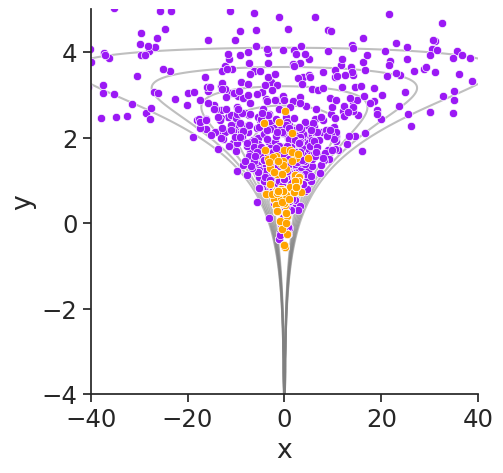

In [32]:
model = get_model('funnel.stan')

print(model.code())
fit = model.sample({},
                   chains=4,
                   iter_warmup=1000,
                   iter_sampling=300,
                   save_warmup=True,
                   show_progress=True,
                   adapt_delta=0.9)
print(fit.diagnose())


xmax=40
ymin, ymax = -4, 5
X = np.linspace(-xmax, xmax, 1001)
Y= np.linspace(ymin, ymax, 1001)
Z=[]
for y in Y:
    Z.append(stats.norm.pdf(X, 0, np.exp(y))* stats.norm.pdf(y, loc=0, scale=3))
Z = np.array(Z)
levels=Z[[900, 850, 800, 750, 700, 650, 600], 500]
ax = fplot.new_figure('funnel').subplots()
ax.contour(X, Y, Z, levels=levels, colors='grey', alpha=0.5, zorder=0)
df= fit.draws_pd()
sns.scatterplot(df, x='x', y='y', legend=False, ax=ax)
sns.scatterplot(df.loc[df.divergent__==True], x='x', y='y',  legend=False, ax=ax)


ax.set_xlim(-xmax, xmax)
ax.set_ylim(ymin,ymax)
fplot.resize(5,5)

10:14:10 - cmdstanpy - INFO - CmdStan start processing


Found .stan file  /home/pietro/work/TESI/baynes/stan/models/funnel/funnel_noncentered.stan
parameters {
  real y;
  real z;
}
transformed parameters {
  real x;
  x = z * exp(y);
}
model {
  y  ~ normal(0, 3);
  z ~ std_normal();
}



chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:14:10 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: /tmp/tmprqtdk878/funnel_noncenteredgct3spta/funnel_noncentered-20231015101410_1.csvWarning: non-fatal error reading adaptation data
, /tmp/tmprqtdk878/funnel_noncenteredgct3spta/funnel_noncentered-20231015101410_2.csvWarning: non-fatal error reading adaptation data
, /tmp/tmprqtdk878/funnel_noncenteredgct3spta/funnel_noncentered-20231015101410_3.csvWarning: non-fatal error reading adaptation data
, /tmp/tmprqtdk878/funnel_noncenteredgct3spta/funnel_noncentered-20231015101410_4.csvWarning: non-fatal error reading adaptation data


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



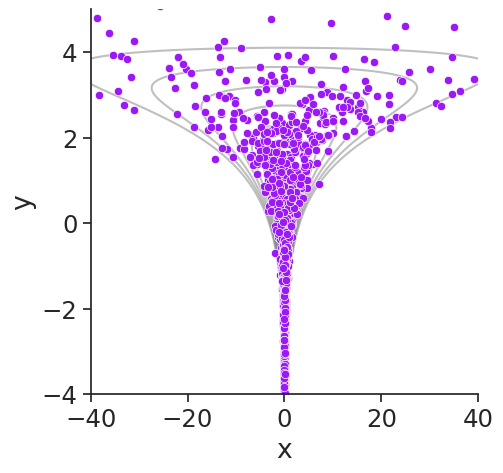

In [33]:
model = get_model('funnel_noncentered.stan')
print(model.code())
fit = model.sample({},
                   chains=4,
                   iter_warmup=1000,
                   iter_sampling=300,
                   save_warmup=True,
                   show_progress=True,
                   adapt_delta=0.9)
print(fit.diagnose())


xmax=40
ymin, ymax = -4, 5
X = np.linspace(-xmax, xmax, 1001)
Y= np.linspace(ymin, ymax, 1001)
Z=[]
for y in Y:
    Z.append(stats.norm.pdf(X, 0, np.exp(y))* stats.norm.pdf(y, loc=0, scale=3))
Z = np.array(Z)
levels=Z[[900, 850, 800, 750, 700, 650, 600], 500]
ax = fplot.new_figure('funnel').subplots()
ax.contour(X, Y, Z, levels=levels, colors='grey', alpha=0.5, zorder=0)
df= fit.draws_pd()
sns.scatterplot(df, x='x', y='y', legend=False, ax=ax)
sns.scatterplot(df.loc[df.divergent__==True], x='x', y='y',  legend=False, ax=ax)


ax.set_xlim(-xmax, xmax)
ax.set_ylim(ymin,ymax)
fplot.resize(5,5)

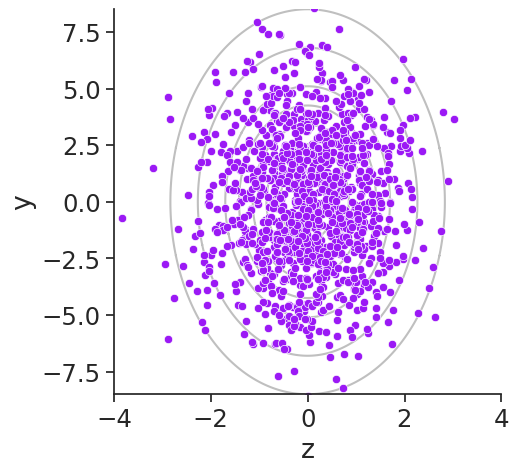

In [34]:
xmax=4
ymin, ymax = -8.5, 8.5
X = np.linspace(-xmax, xmax, 1001)
Y= np.linspace(ymin, ymax, 1001)
Z=[]
for y in Y:
    Z.append(stats.norm.pdf(X, 0, 1)* stats.norm.pdf(y, loc=0, scale=3))
Z = np.array(Z)
levels=Z[[1000,900, 800, 750, 700, 650, 600], 500]
ax = fplot.new_figure('funnel').subplots()
ax.contour(X, Y, Z, levels=levels, colors='grey', alpha=0.5, zorder=0)
df= fit.draws_pd()
sns.scatterplot(df, x='z', y='y', legend=False, ax=ax)
sns.scatterplot(df.loc[df.divergent__==True], x='z', y='y',  legend=False, ax=ax)
ax.set_xlim(-xmax, xmax)
ax.set_ylim(ymin,ymax)
fplot.resize(5,5)

In [35]:
fplot.save_figures('all')